MSE: 10.57
RMSE: 3.25


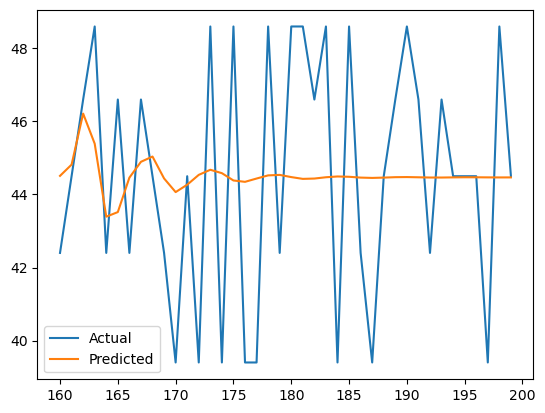

In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load data
df = pd.read_csv('data/00_bootstrap.csv')

# Assuming you have your data in a DataFrame called 'df'
# with a column 'SCORE_AR' for the target variable

# Split data into train/test
train_size = int(len(df) * 0.8)
train = df['SCORE_AR'][:train_size]
test = df['SCORE_AR'][train_size:]

# Fit ARIMA model - adjust (p,d,q) orders as needed
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))

# Calculate MSE
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

# Optional: Plot actual vs predicted
import matplotlib.pyplot as plt
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Predicted')
plt.legend()
plt.show()